<center><h1>Hemnani_Hitika_HW7</h1></center>

Name: Hitika Hemnani
<br>
Github Username: hhemnani
<br>
USC ID: 8304678802

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [9]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE

### (a) Download the Anuran Calls (MFCCs) Data Set

In [10]:
MFCC_data= pd.read_csv('../data/Frogs_MFCCs.csv')

In [11]:
MFCC_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [12]:
y=MFCC_data[['Family','Genus','Species']]
X=MFCC_data.drop(['Family','Genus','Species','RecordID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=22)


### (b) Train a classifier for each label

#### (i) Research

###### Exact Match (All-or-Nothing Accuracy)
Checks if every predicted label for a sample is 100% correct<br>
No partial credit—even one wrong label means the whole sample is wrong<br>
###### Hamming loss
Hamming-Loss is the fraction of labels that are incorrectly predicted

In [13]:
# 1. Preparing both standardized and raw data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### (ii) Train a SVM for each of the labels

In [14]:
# 2. Defining labels to predict
labels = ['Family', 'Genus', 'Species']

# 3. Setting up parameter grid for cross-validation
param_grid = {
    'C': [0.1, 1, 10, 100],      # SVM penalty weights
    'gamma': [0.001, 0.01, 0.1, 1]  # Gaussian kernel widths
}

# 4. Initializing results to store predictions and Hamming scores
results = {'standardized': {'predictions': {}, 'hamming_scores': []},
           'raw': {'predictions': {}, 'hamming_scores': []}}

# Iterating over both standardized and raw data types
for data_type in ['standardized', 'raw']:
    print(f"\n=== Using {data_type} data ===")
    # Selecting the appropriate training and test features
    X_tr = X_train_std if data_type == 'standardized' else X_train
    X_te = X_test_std if data_type == 'standardized' else X_test
    
    for label in labels:
        print(f"\nTraining {label} SVM")
        
        # Training SVM with Gaussian (RBF) kernel using one-vs-all strategy
        svm = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
        svm.fit(X_tr, y_train[label])
        
        # predictions
        preds = svm.predict(X_te)
        results[data_type]['predictions'][label] = preds
        
        # Calculating Hamming score (1 - Hamming loss)
        hamming_score = 1 - hamming_loss(y_test[label], preds)
        results[data_type]['hamming_scores'].append(hamming_score)

        # best hyperparameters and evaluation metrics
        print(f"Best params: {svm.best_params_}")
        print(f"Hamming score: {hamming_score:.4f}")
        print(classification_report(y_test[label], preds))
        
# 5. Calculating exact match scores across all labels
for data_type in ['standardized', 'raw']:
    correct = 0
    for i in range(len(X_test)):
        if all(y_test[label].iloc[i] == results[data_type]['predictions'][label][i] 
               for label in labels):
            correct += 1

    # Computing exact match ratio and average Hamming score
    exact_match = correct / len(X_test)
    avg_hamming = np.mean(results[data_type]['hamming_scores'])
    
    print(f"\nFinal {data_type} results:")
    print(f"Exact Match: {exact_match:.4f}")
    print(f"Avg Hamming Score: {avg_hamming:.4f}")


=== Using standardized data ===

Training Family SVM
Best params: {'C': 10, 'gamma': 0.1}
Hamming score: 0.9875
                 precision    recall  f1-score   support

      Bufonidae       0.88      0.75      0.81        20
  Dendrobatidae       1.00      1.00      1.00       163
        Hylidae       0.97      1.00      0.98       648
Leptodactylidae       1.00      0.99      0.99      1328

       accuracy                           0.99      2159
      macro avg       0.96      0.93      0.95      2159
   weighted avg       0.99      0.99      0.99      2159


Training Genus SVM
Best params: {'C': 100, 'gamma': 0.01}
Hamming score: 0.9861
               precision    recall  f1-score   support

    Adenomera       0.99      1.00      1.00      1239
     Ameerega       0.99      0.99      0.99       163
Dendropsophus       0.96      0.97      0.97       100
    Hypsiboas       0.99      0.99      0.99       478
Leptodactylus       0.96      0.96      0.96        89
Osteocephalus   

#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [15]:
# For Storing predicted labels and Hamming scores
y_pred = {}
avg_hamming_L1 = []

# Training L1-penalized SVM for each label
for label in ['Family', 'Genus', 'Species']:
    print(f"\nTraining {label} classifier")
    
    # Parameter grid for cross-validation
    param_grid = {
        'C': [0.1, 1, 10, 100],  # SVM penalty parameter
        'max_iter': [2000]        # Maximum iterations
    }
    
    # Creating L1-penalized linear SVM with one-vs-rest strategy
    svm = LinearSVC(penalty='l1', 
                   loss='squared_hinge',
                   dual=False,
                   multi_class='ovr')
    
    # 10-fold cross-validation
    clf = GridSearchCV(svm, param_grid, cv=10)
    clf.fit(X_train_std, y_train[label])
    
    #reporting results
    print(f"Best parameters for {label}: {clf.best_params_}")
    y_pred[label] = clf.predict(X_test_std)
    print(classification_report(y_test[label], y_pred[label]))
    
    # Calculating Hamming score
    current_hamming = 1 - hamming_loss(y_test[label], y_pred[label])
    avg_hamming_L1.append(current_hamming)
    print(f"Hamming score for {label}: {current_hamming:.4f}")

# Calculating exact match score
exact_matches = 0
for i in range(len(X_test)):
    if all(y_test[label].iloc[i] == y_pred[label][i] for label in ['Family', 'Genus', 'Species']):
        exact_matches += 1

exact_match_score = exact_matches / len(X_test)
average_hamming = np.mean(avg_hamming_L1)

# Final results
print("\nFinal Evaluation----L1-penalized SVM")
print(f"Exact Match Score: {exact_match_score:.4f}")
print(f"Average Hamming Score: {average_hamming:.4f}")


Training Family classifier


C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters for Family: {'C': 1, 'max_iter': 2000}
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        20
  Dendrobatidae       0.89      0.88      0.89       163
        Hylidae       0.91      0.89      0.90       648
Leptodactylidae       0.95      0.97      0.96      1328

       accuracy                           0.93      2159
      macro avg       0.69      0.69      0.69      2159
   weighted avg       0.92      0.93      0.93      2159

Hamming score for Family: 0.9296

Training Genus classifier


C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase

Best parameters for Genus: {'C': 10, 'max_iter': 2000}
               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1239
     Ameerega       0.93      0.95      0.94       163
Dendropsophus       0.92      0.68      0.78       100
    Hypsiboas       0.93      0.96      0.95       478
Leptodactylus       0.95      0.87      0.91        89
Osteocephalus       0.93      0.52      0.67        27
     Rhinella       0.83      0.75      0.79        20
       Scinax       0.98      0.95      0.96        43

     accuracy                           0.95      2159
    macro avg       0.93      0.83      0.87      2159
 weighted avg       0.95      0.95      0.95      2159

Hamming score for Genus: 0.9518

Training Species classifier


C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters for Species: {'C': 100, 'max_iter': 2000}
                        precision    recall  f1-score   support

        AdenomeraAndre       0.90      0.94      0.92       206
AdenomeraHylaedactylus       0.99      1.00      0.99      1033
    Ameeregatrivittata       0.92      0.96      0.94       163
            HylaMinuta       0.94      0.72      0.81       100
  HypsiboasCinerascens       0.93      0.95      0.94       130
     HypsiboasCordobae       0.94      0.97      0.95       348
   LeptodactylusFuscus       0.95      0.90      0.92        89
 OsteocephalusOophagus       1.00      0.59      0.74        27
     Rhinellagranulosa       0.75      0.75      0.75        20
           ScinaxRuber       0.95      0.95      0.95        43

              accuracy                           0.96      2159
             macro avg       0.93      0.87      0.89      2159
          weighted avg       0.96      0.96      0.95      2159

Hamming score for Species: 0.9560

Final Ev

#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [16]:
# dictionary to store predictions and list to store Hamming scores
y_pred = {}
avg_hamming_smote = []

# Training L1-penalized SVM for each label with SMOTE
for label in ['Family', 'Genus', 'Species']:
    print(f"\nTraining {label} classifier with SMOTE")
    
    # Applying SMOTE to address class imbalance in the training set
    smote = SMOTE(random_state=42, sampling_strategy='auto')
    X_resampled, y_resampled = smote.fit_resample(X_train_std, y_train[label])
    
    # Parameter grid for cross-validation
    param_grid = {
        'C': [0.1, 1, 10, 100],  # SVM penalty parameter
        'max_iter': [2000]        # Maximum iterations
    }
    
    # Creating L1-penalized SVM with one-vs-rest
    svm = LinearSVC(penalty='l1', 
                   loss='squared_hinge',
                   dual=False,
                   multi_class='ovr',
                   class_weight='balanced')  # Added class_weight for additional imbalance handling
    
    # 10-fold cross-validation
    clf = GridSearchCV(svm, param_grid, cv=10)
    clf.fit(X_resampled, y_resampled)
    
    # results
    print(f"Best parameters for {label}: {clf.best_params_}")
    y_pred[label] = clf.predict(X_test_std)
    print(classification_report(y_test[label], y_pred[label]))
    
    # Calculating Hamming score
    current_hamming = 1 - hamming_loss(y_test[label], y_pred[label])
    avg_hamming_smote.append(current_hamming)
    print(f"Hamming score for {label}: {current_hamming:.4f}")

# Calculating exact match score
df_match = pd.DataFrame()
for label in ['Family', 'Genus', 'Species']:
    df_match[label] = np.where(y_test[label] == y_pred[label], 1, 0)

df_match['sum'] = df_match.sum(axis=1)
exact_match_score_SMOTE = (df_match['sum'] == 3).mean()
average_hamming_SMOTE= np.mean(avg_hamming_smote)

# Final results
print("\nFinal Evaluation with SMOTE")
print(f"Exact Match Score: {exact_match_score_SMOTE:.4f}")
print(f"Average Hamming Score: {average_hamming_SMOTE:.4f}")

# Comparing with original results
print("\nComparison with original imbalanced training:")
print(f"Exact Match Score for original : {exact_match_score:.4f}")
print(f"Average Hamming Score for original: {average_hamming:.4f}")
print(f"Exact Match Score using SMOTE: {exact_match_score_SMOTE:.4f}")
print(f"Average Hamming Score using SMOTE: {average_hamming_SMOTE:.4f}")



Training Family classifier with SMOTE


C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best parameters for Family: {'C': 1, 'max_iter': 2000}
                 precision    recall  f1-score   support

      Bufonidae       0.25      0.85      0.39        20
  Dendrobatidae       0.78      0.98      0.87       163
        Hylidae       0.94      0.87      0.90       648
Leptodactylidae       0.97      0.94      0.95      1328

       accuracy                           0.92      2159
      macro avg       0.73      0.91      0.78      2159
   weighted avg       0.94      0.92      0.93      2159

Hamming score for Family: 0.9189

Training Genus classifier with SMOTE


C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Best parameters for Genus: {'C': 10, 'max_iter': 2000}
               precision    recall  f1-score   support

    Adenomera       0.98      0.91      0.94      1239
     Ameerega       0.86      0.95      0.90       163
Dendropsophus       0.69      0.83      0.75       100
    Hypsiboas       0.96      0.92      0.94       478
Leptodactylus       0.96      0.88      0.92        89
Osteocephalus       0.43      0.93      0.59        27
     Rhinella       0.28      0.80      0.42        20
       Scinax       0.84      0.98      0.90        43

     accuracy                           0.91      2159
    macro avg       0.75      0.90      0.80      2159
 weighted avg       0.94      0.91      0.92      2159

Hamming score for Genus: 0.9115

Training Species classifier with SMOTE


C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase

Best parameters for Species: {'C': 10, 'max_iter': 2000}
                        precision    recall  f1-score   support

        AdenomeraAndre       0.93      0.90      0.91       206
AdenomeraHylaedactylus       0.99      0.99      0.99      1033
    Ameeregatrivittata       0.93      0.94      0.93       163
            HylaMinuta       0.86      0.83      0.85       100
  HypsiboasCinerascens       0.91      0.95      0.93       130
     HypsiboasCordobae       0.97      0.94      0.95       348
   LeptodactylusFuscus       0.97      0.84      0.90        89
 OsteocephalusOophagus       0.71      0.93      0.81        27
     Rhinellagranulosa       0.47      0.85      0.61        20
           ScinaxRuber       0.91      0.95      0.93        43

              accuracy                           0.95      2159
             macro avg       0.87      0.91      0.88      2159
          weighted avg       0.96      0.95      0.95      2159

Hamming score for Species: 0.9514

Final Eva

C:\Users\Hritika\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The Gaussian SVM with RBF kernel achieved the highest performance (Exact Match: 0.9815, Hamming: 0.9878), significantly outperforming both the original l1 model (0.9129/0.9458) and SMOTE-enhanced version (0.8624/0.9271).

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [21]:
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Monte Carlo simulation
n_runs = 50
hamming_scores = []
majority_reports = []  # To store majority information for each run

for run in range(n_runs):
    print(f"\n=== Run {run+1} ===")
    
    # Determining optimal number of clusters using silhouette score
    silhouette_scores = defaultdict(list)
    for k in range(2, 16):# Trying values of k from 2 to 15
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=run)
        labels = kmeans.fit_predict(X)
        silhouette_scores[k].append(silhouette_score(X, labels))

    # average silhouette scores for each k
    print(f"Avg Silhouette scores: {dict(silhouette_scores)}")

    # k with highest silhouette score
    optimal_k = max(silhouette_scores, key=lambda k: silhouette_scores[k][0])
    print(f"Optimal value of clusters is: {optimal_k}")
    
    # Clustering with optimal k
    kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=run)
    cluster_labels = kmeans.fit_predict(X)
    
    # Majority labels in each cluster
    clustered_data = pd.concat([X, y, pd.Series(cluster_labels, name='Cluster')], axis=1)
    majority = {}
    
    # report for current run
    run_report = {
        'run_number': run+1,
        'optimal_k': optimal_k,
        'cluster_details': []
    }

    # Finding majority Family, Genus, and Species in each cluste
    for cluster in range(optimal_k):
        cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
        majority[cluster] = (
            cluster_data['Family'].mode()[0],
            cluster_data['Genus'].mode()[0],
            cluster_data['Species'].mode()[0]
        )
        
        # Detailed cluster-level info to the run report
        run_report['cluster_details'].append({
            'cluster_id': cluster,
            'family': cluster_data['Family'].mode()[0],
            'genus': cluster_data['Genus'].mode()[0],
            'species': cluster_data['Species'].mode()[0],
            'count': len(cluster_data)
        })

    # Report for this run
    majority_reports.append(run_report)
    print(f"Majority triplet for run {run+1}: {majority}")
    
    # Predicted labels and Hamming score
    y_pred = clustered_data['Cluster'].map(majority)
    y_pred = pd.DataFrame(y_pred.tolist(), columns=['Family', 'Genus', 'Species'])
    scores = [1 - hamming_loss(y[col], y_pred[col]) for col in y.columns]
    hamming_scores.append(np.mean(scores))
    print(f"Hamming score for run {run+1}: {np.mean(scores):.4f}")



=== Run 1 ===
Avg Silhouette scores: {2: [0.3486778410277152], 3: [0.367684233836958], 4: [0.3787509343305295], 5: [0.37148280578022025], 6: [0.2644130229717876], 7: [0.2604204923517758], 8: [0.25454774287388815], 9: [0.27612135807562244], 10: [0.2810546065366802], 11: [0.27134730934052204], 12: [0.2720587772301794], 13: [0.27560493358320415], 14: [0.26459200905518193], 15: [0.2710716447576565]}
Optimal value of clusters is: 4
Majority triplet for run 1: {0: ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'), 1: ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae'), 2: ('Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'), 3: ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')}
Hamming score for run 1: 0.7776

=== Run 2 ===
Avg Silhouette scores: {2: [0.3486778410277152], 3: [0.36768245219926315], 4: [0.3787509343305295], 5: [0.37148280578022025], 6: [0.264008021116715], 7: [0.270440085356765], 8: [0.2808269101044866], 9: [0.26390911873690237], 10: [0.2808523838647606], 11: [0.270624734303

### (b) Determine which family is the majority

In [22]:

# Comprehensive majority report
print("\n=== Majority Label Report Across All Runs ===")
for report in majority_reports:
    print(f"\nRun {report['run_number']} (k={report['optimal_k']}):")
    for cluster in report['cluster_details']:
        print(f"  Cluster {cluster['cluster_id']}:")
        print(f"    Family: {cluster['family']}")
        print(f"    Genus: {cluster['genus']}")
        print(f"    Species: {cluster['species']}")
        print(f"    Samples: {cluster['count']}")


=== Majority Label Report Across All Runs ===

Run 1 (k=4):
  Cluster 0:
    Family: Leptodactylidae
    Genus: Adenomera
    Species: AdenomeraHylaedactylus
    Samples: 3568
  Cluster 1:
    Family: Hylidae
    Genus: Hypsiboas
    Species: HypsiboasCordobae
    Samples: 1982
  Cluster 2:
    Family: Dendrobatidae
    Genus: Ameerega
    Species: Ameeregatrivittata
    Samples: 1031
  Cluster 3:
    Family: Hylidae
    Genus: Hypsiboas
    Species: HypsiboasCinerascens
    Samples: 614

Run 2 (k=4):
  Cluster 0:
    Family: Hylidae
    Genus: Hypsiboas
    Species: HypsiboasCordobae
    Samples: 1982
  Cluster 1:
    Family: Leptodactylidae
    Genus: Adenomera
    Species: AdenomeraHylaedactylus
    Samples: 3568
  Cluster 2:
    Family: Dendrobatidae
    Genus: Ameerega
    Species: Ameeregatrivittata
    Samples: 1031
  Cluster 3:
    Family: Hylidae
    Genus: Hypsiboas
    Species: HypsiboasCinerascens
    Samples: 614

Run 3 (k=4):
  Cluster 0:
    Family: Leptodactylidae
    

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [23]:
# Final results
print("\n=== Final Results ===")
print(f"Average Hamming Score across {n_runs} runs: {np.mean(hamming_scores):.4f}")
print(f"Standard Deviation: {np.std(hamming_scores):.4f}")


=== Final Results ===
Average Hamming Score across 50 runs: 0.7760
Standard Deviation: 0.0056


## 3. ISLR 12.6.2

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
#Given
dissimilarity_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])
# converting the dissimilarity matrix to condensed form
condensed_dist = squareform(dissimilarity_matrix)

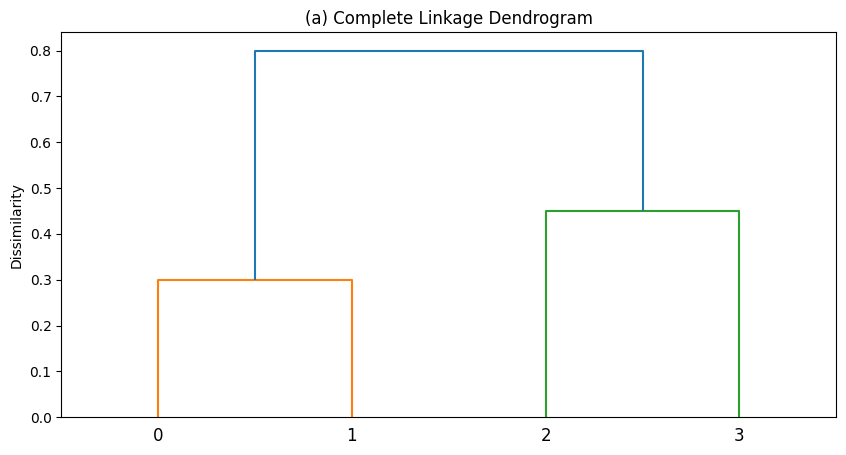

In [25]:
#(a) plotting the dendrogram using complete linkage
plt.figure(figsize=(10, 5))
complete_linkage = linkage(condensed_dist, method='complete')
dendrogram(complete_linkage, labels=["0", "1", "2", "3"])
plt.title("(a) Complete Linkage Dendrogram")
plt.ylabel("Dissimilarity")
plt.show()

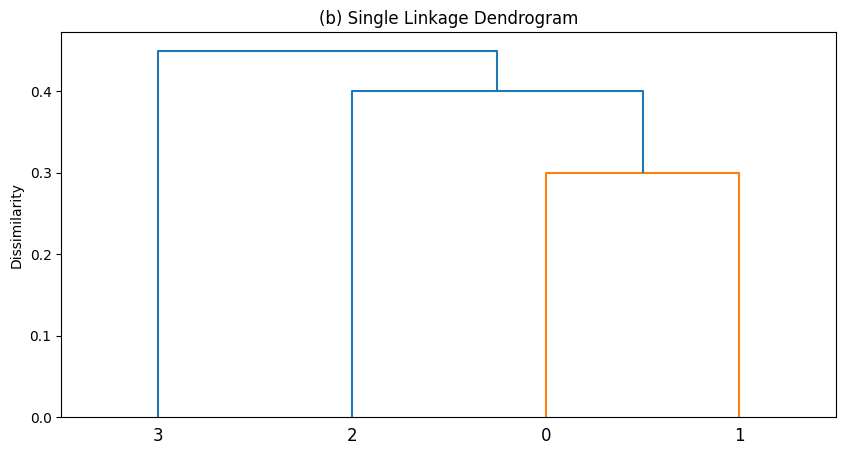

In [26]:
#(b)plotting the dendrogram using single linkage
plt.figure(figsize=(10, 5))
single_linkage = linkage(condensed_dist, method='single')
dendrogram(single_linkage, labels=["0", "1", "2", "3"])
plt.title("(b) Single Linkage Dendrogram")
plt.ylabel("Dissimilarity")
plt.show()

(c)<br>
From (a), the final merge is at height = 0.8, combining {0,1} and {2,3}. Cutting just before this gives:<br>
<br>
Cluster 1: {0, 1}<br>
<br>
Cluster 2: {2, 3}<br>

(d)<br> 
Cutting Single Linkage Dendrogram for 2 Clusters
From (b), the final merge is at height = 0.45, combining {0,1,2} and {3}. Cutting just before this gives:<br>
<br>
Cluster 1: {0, 1, 2}<br>
<br>
Cluster 2: {3}<br>

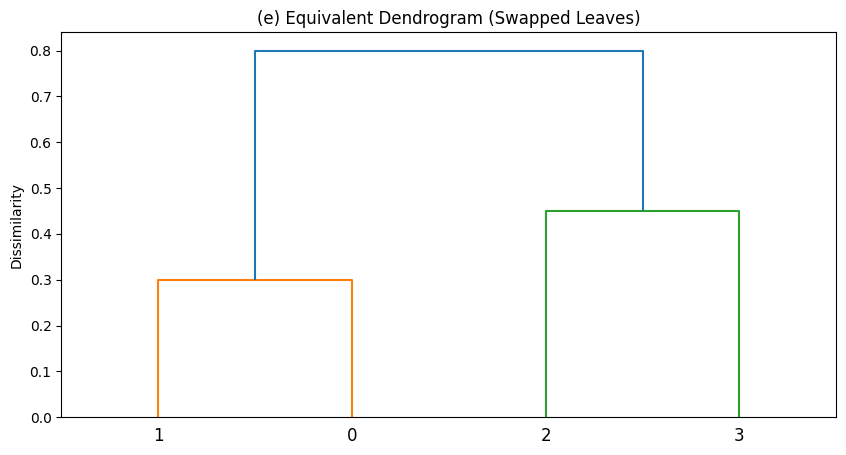

In [27]:
#(e)swapping the position of two leaves and drawing the equivalent dendrogram
plt.figure(figsize=(10, 5))
dendrogram(complete_linkage, labels=["1", "0", "2", "3"])  # Swapped 0 and 1
plt.title("(e) Equivalent Dendrogram (Swapped Leaves)")
plt.ylabel("Dissimilarity")
plt.show()